## Rips Experiemnt 1
goal: to find a good example to show our updating scheme performance

In [1]:
import bats
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.spatial.distance as distance
import csv 
import pandas as pd

In [2]:
def time_BATS_updates_enc_rips_record(X, Y, dmax = 2):
    rec = []
    
    t0 = time.monotonic()
    DX = distance.squareform(distance.pdist(X))
    rX = bats.enclosing_radius(bats.Matrix(DX))
    t1 = time.monotonic()
    #print("setup1: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    F = bats.LightRipsFiltration(bats.Matrix(DX), rX, dmax)
    t1 = time.monotonic()
    #print("construct1: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    #print("reduce1: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    nnz_old_U = np.sum(R.nnz_U())
    nnz_old_R = np.sum(R.nnz_R())
    
    t0 = time.monotonic()
    DY = distance.squareform(distance.pdist(Y))
    rY = bats.enclosing_radius(bats.Matrix(DY))
    t1 = time.monotonic()
    #print("setup2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    FY = bats.LightRipsFiltration(bats.Matrix(DY), rY, dmax)
    t1 = time.monotonic()
    #print("construct2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    RY = bats.reduce(FY, bats.F2())
    t1 = time.monotonic()
    #print("reduce2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    t_reb = t1-t0
    nnz_reb_U = np.sum(RY.nnz_U())
    nnz_reb_R = np.sum(RY.nnz_R())
    
    t0 = time.monotonic()
    update_info = bats.UpdateInfoLightFiltration(F, FY)
    R.update_filtration_general(update_info)
    t1 = time.monotonic()
    #print("update2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    t_upd = t1-t0
    factor = round(t_reb/t_upd, 4)
    rec.append(factor)
    nnz_upd_U = np.sum(R.nnz_U())
    nnz_upd_R = np.sum(R.nnz_R())
    
    rec.append(nnz_old_U)
    rec.append(nnz_reb_U)
    rec.append(nnz_upd_U)
    rec.append(nnz_old_R)
    rec.append(nnz_reb_R)
    rec.append(nnz_upd_R)
    
    return rec

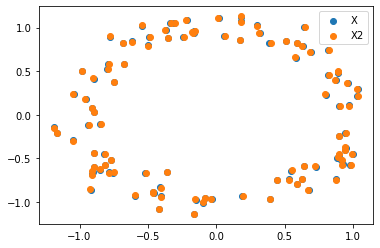

In [3]:
n = 100
X = np.random.uniform(-1,1,(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1)
X2 = X + 0.005*np.random.randn(n,2)
fig = plt.scatter(X[:,0], X[:,1], label = "X")
plt.scatter(X2[:,0], X2[:,1], label = "X2")
plt.legend()
plt.show()

In [4]:
header = ['setup1','contruct1', 'reduce1', 
          'setup2','contruct2', 'reduce2',
          'update2','speedup factor',
          'nnz_old_U', 'nnz_reb_U', 'nnz_upd_U',
          'nnz_old_R', 'nnz_reb_R', 'nnz_upd_R'] # set header of csv file
data = []

with open('rips1.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    # write the header
    writer.writerow(header)
    
    for i in range(5):
        data.append(time_BATS_updates_enc_rips_record(X,X2))
    
    data = np.array(data)
    avg = np.mean(data, axis = 0)
    data = list(data)
    data.append(avg)
    # write multiple rows
    writer.writerows(data)

In [5]:
df = pd.read_csv('rips1.csv', usecols = range(8))
df

,setup1,contruct1,reduce1,setup2,contruct2,reduce2,update2,speedup factor
0,0.000302,0.086240,0.996583,0.000231,0.037045,0.720267,0.201209,3.57970
1,0.000336,0.021523,0.242346,0.000204,0.022421,0.229720,0.099501,2.30870
2,0.000312,0.017425,0.239438,0.000216,0.028046,0.231072,0.098831,2.33800
3,0.000317,0.017046,0.229447,0.000207,0.018563,0.229544,0.094844,2.42020
4,0.000357,0.017713,0.227755,0.000257,0.020633,0.227307,0.090264,2.51830
5,0.000325,0.031989,0.387114,0.000223,0.025342,0.327582,0.116930,2.63298


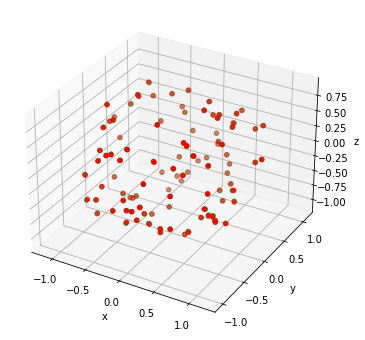

In [4]:
n = 100
d = 3
X = np.random.uniform(-1,1,(n,d))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,d), scale = 0.1)
X2 = X + 0.005*np.random.randn(n,d)

fig = plt.figure(figsize=(9, 6))

#3d container
ax = plt.axes(projection = '3d')
#3d scatter plot
ax.scatter3D(X[:,0], X[:,1], X[:,2], c = 'r')
ax.scatter3D(X2[:,0], X2[:,1], X2[:,2], c = 'g')
#give labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#save figure
plt.savefig('3d_plot.png', dpi = 300);

In [5]:
header = ['setup1','contruct1', 'reduce1', 
          'setup2','contruct2', 'reduce2',
          'update2','speedup factor',
          'nnz_old_U', 'nnz_reb_U', 'nnz_upd_U',
          'nnz_old_R', 'nnz_reb_R', 'nnz_upd_R'] # set header of csv file
data = []

with open('rips1_3D.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    # write the header
    writer.writerow(header)
    
    for i in range(5):
        data.append(time_BATS_updates_enc_rips_record(X,X2, 3))
    
    data = np.array(data)
    avg = np.mean(data, axis = 0)
    data = list(data)
    data.append(avg)
    # write multiple rows
    writer.writerows(data)

In [6]:
df = pd.read_csv('rips1_3D.csv', usecols = range(8))
df

,setup1,contruct1,reduce1,setup2,contruct2,reduce2,update2,speedup factor
0,0.000249,1.090411,33.959630,0.000213,1.065741,39.402175,13.231235,2.97800
1,0.065723,0.647383,11.293555,0.000222,1.081142,10.945992,6.045326,1.81070
2,0.000343,0.605649,10.533644,0.000202,1.016613,11.091806,5.182277,2.14030
3,0.000373,0.578590,10.424396,0.000265,1.024537,10.825348,5.353100,2.02230
4,0.000313,0.570720,10.381764,0.000201,1.005790,10.982164,5.363522,2.04760
5,0.013400,0.698551,15.318598,0.000220,1.038764,16.649497,7.035092,2.19978


## Rips Experiemnt 2
goal: add flag into consideration

In [1]:
import bats
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.spatial.distance as distance
import csv 
import pandas as pd

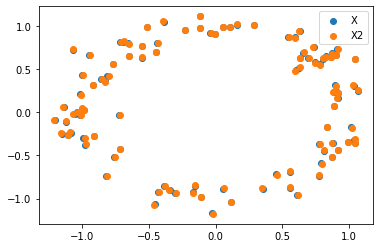

In [7]:
n = 100
X = np.random.uniform(-1,1,(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1)
X2 = X + 0.005*np.random.randn(n,2)
fig = plt.scatter(X[:,0], X[:,1], label = "X")
plt.scatter(X2[:,0], X2[:,1], label = "X2")
plt.legend()
plt.show()

In [16]:
def time_BATS_rips_flags(X, flags=(bats.standard_reduction_flag(), bats.compute_basis_flag())):
    tlist = []
    
    t0 = time.monotonic()
    DX = distance.squareform(distance.pdist(X))
    rX = bats.enclosing_radius(bats.Matrix(DX))
    t1 = time.monotonic()
    #print("setup1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    F = bats.LightRipsFiltration(bats.Matrix(DX), rX, 2)
    t1 = time.monotonic()
    #print("construct1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2(), *flags)
    t1 = time.monotonic()
    #print("reduce1: {} sec.".format(t1 - t0))
    
    return t1-t0
    
flags = [
    (bats.standard_reduction_flag(), bats.compute_basis_flag()),
    (bats.standard_reduction_flag(),),
    (bats.standard_reduction_flag(), bats.clearing_flag()),
    (bats.standard_reduction_flag(), bats.compression_flag())
]
labels = [
    "standard w/ basis",
    "standard w/ no basis",
    "standard w/ clearing",
    "standard w/ compression",
]

Our updating scheme can compete with the clearing and compression method.

In [28]:
# Rebuild using flag
data = []
for i in range(10):
    data_n = []
    for flag, label in zip(flags, labels):
        data_n.append(time_BATS_rips_flags(X2, flag))
    data.append(data_n)

data = np.array(data)
data = np.mean(data, axis = 0)
print(data)

[0.1766594  0.09406469 0.09128678 0.08879267]


In [29]:
def time_BATS_updates_rips(X, Y):
    
    t0 = time.monotonic()
    DX = distance.squareform(distance.pdist(X))
    rX = bats.enclosing_radius(bats.Matrix(DX))
    t1 = time.monotonic()
    #print("setup1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    F = bats.LightRipsFiltration(bats.Matrix(DX), rX, 2)
    t1 = time.monotonic()
    #print("construct1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    #print("reduce1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    DY = distance.squareform(distance.pdist(Y))
    rY = bats.enclosing_radius(bats.Matrix(DY))
    t1 = time.monotonic()
    #print("setup2: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    FY = bats.LightRipsFiltration(bats.Matrix(DY), rY, 2)
    t1 = time.monotonic()
    #print("construct2: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    update_info = bats.UpdateInfoLightFiltration(F, FY)
    R.update_filtration_general(update_info)
    t1 = time.monotonic()
    #print("update2: {} sec.".format(t1 - t0))
    
    return t1-t0


# Rebuild using flag
data = []
for i in range(10):
    data.append(time_BATS_updates_rips(X, X2))

In [31]:
np.mean(data)

0.0857638774003135

#### On 3 dimensional sphere

In [2]:
n = 100
d = 3
X = np.random.uniform(-1,1,(n,d))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,d), scale = 0.1)
X2 = X + 0.005*np.random.randn(n,d)

In [4]:
def time_BATS_rips_flags(X, dmax = 3, flags=(bats.standard_reduction_flag(), bats.compute_basis_flag())):
    tlist = []
    
    t0 = time.monotonic()
    DX = distance.squareform(distance.pdist(X))
    rX = bats.enclosing_radius(bats.Matrix(DX))
    t1 = time.monotonic()
    #print("setup1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    F = bats.LightRipsFiltration(bats.Matrix(DX), rX, dmax)
    t1 = time.monotonic()
    #print("construct1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2(), *flags)
    t1 = time.monotonic()
    #print("reduce1: {} sec.".format(t1 - t0))
    
    return t1-t0


In [5]:
flags = [
    (bats.standard_reduction_flag(), bats.compute_basis_flag()),
    (bats.standard_reduction_flag(),),
    (bats.standard_reduction_flag(), bats.clearing_flag()),
    (bats.standard_reduction_flag(), bats.compression_flag())
]
labels = [
    "standard w/ basis",
    "standard w/ no basis",
    "standard w/ clearing",
    "standard w/ compression",
]

In [6]:
# Rebuild using flag
data = []
for i in range(10):
    data_n = []
    for flag, label in zip(flags, labels):
        data_n.append(time_BATS_rips_flags(X2, 3, flag))
    data.append(data_n)

data = np.array(data)
data = np.mean(data, axis = 0)
print(data)

[15.73967863  6.79485843  6.68660843  5.06946224]


## Rips Experiemnt 3
Update metric

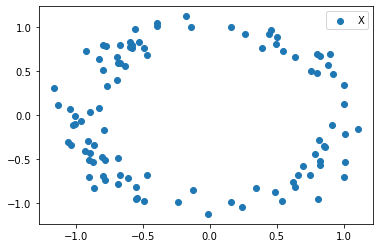

In [3]:
n = 100
X = np.random.uniform(-1,1,(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1)
fig = plt.scatter(X[:,0], X[:,1], label = "X")
plt.legend()
plt.show()

In [4]:
def enc_rips_record_metric(X, dmax = 2):
    rec = []
    
    t0 = time.monotonic()
    DX = distance.squareform(distance.pdist(X))
    rX = bats.enclosing_radius(bats.Matrix(DX))
    t1 = time.monotonic()
    #print("setup1: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    F = bats.LightRipsFiltration(bats.Matrix(DX), rX, dmax)
    t1 = time.monotonic()
    #print("construct1: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    #print("reduce1: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    nnz_old_U = np.sum(R.nnz_U())
    nnz_old_R = np.sum(R.nnz_R())
    
    t0 = time.monotonic()
    DY = distance.squareform(distance.pdist(X, 'minkowski', p=1))
    rY = bats.enclosing_radius(bats.Matrix(DY))
    t1 = time.monotonic()
    #print("setup2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    FY = bats.LightRipsFiltration(bats.Matrix(DY), rY, dmax)
    t1 = time.monotonic()
    #print("construct2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    RY = bats.reduce(FY, bats.F2())
    t1 = time.monotonic()
    #print("reduce2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    t_reb = t1-t0
    nnz_reb_U = np.sum(RY.nnz_U())
    nnz_reb_R = np.sum(RY.nnz_R())
    
    t0 = time.monotonic()
    update_info = bats.UpdateInfoLightFiltration(F, FY)
    R.update_filtration_general(update_info)
    t1 = time.monotonic()
    #print("update2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    t_upd = t1-t0
    factor = round(t_reb/t_upd, 4)
    rec.append(factor)
    nnz_upd_U = np.sum(R.nnz_U())
    nnz_upd_R = np.sum(R.nnz_R())
    
    rec.append(nnz_old_U)
    rec.append(nnz_reb_U)
    rec.append(nnz_upd_U)
    rec.append(nnz_old_R)
    rec.append(nnz_reb_R)
    rec.append(nnz_upd_R)
    
    return rec

In [11]:
header = ['setup1','contruct1', 'reduce1', 
          'setup2','contruct2', 'reduce2',
          'update2','speedup factor',
          'nnz_old_U', 'nnz_reb_U', 'nnz_upd_U',
          'nnz_old_R', 'nnz_reb_R', 'nnz_upd_R'] # set header of csv file
data = []

with open('rips3.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    # write the header
    writer.writerow(header)
    
    for i in range(5):
        data.append(enc_rips_record_metric(X))
    
    data = np.array(data)
    avg = np.mean(data, axis = 0)
    data = list(data)
    data.append(avg)
    # write multiple rows
    writer.writerows(data)

In [12]:
df = pd.read_csv('rips3.csv', usecols = range(8))
df

,setup1,contruct1,reduce1,setup2,contruct2,reduce2,update2,speedup factor
0,0.000218,0.036377,0.249583,0.000191,0.018708,0.207327,0.219997,0.94240
1,0.000325,0.015936,0.285765,0.000195,0.034826,0.265630,0.247718,1.07230
2,0.000379,0.018243,0.220605,0.000194,0.020643,0.234666,0.245974,0.95400
3,0.000340,0.016630,0.216240,0.000178,0.018699,0.208741,0.244152,0.85500
4,0.000323,0.017862,0.244716,0.000224,0.021970,0.213196,0.233345,0.91370
5,0.000317,0.021010,0.243382,0.000196,0.022969,0.225912,0.238237,0.94748


## Experiment 4 (might not be useful)
updating on 3 dimensional cirlce.

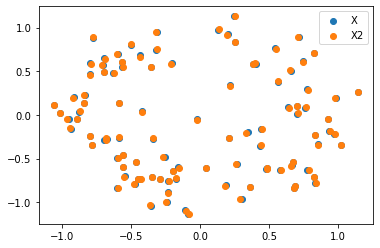

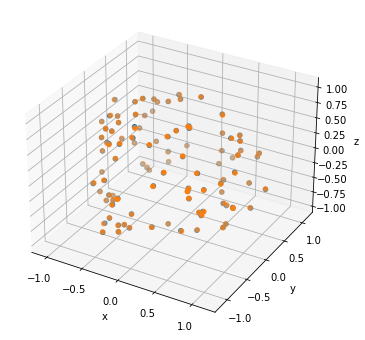

In [22]:
fig = plt.figure(figsize=(9, 6))
#create data for 3d line
xline = np.linspace(0, 15, 1000)
yline = np.sin(xline)
zline = np.cos(xline)
#3d container
ax = plt.axes(projection = '3d')
#3d scatter plot
ax.scatter3D(X[:,0], X[:,1], X[:,2])
ax.scatter3D(X2[:,0], X2[:,1], X2[:,2])
#give labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#save figure
plt.savefig('3d_plot.png', dpi = 300);

In [17]:
ax.plot3D?